***

# Machine Learning & Statistics Assessment - Scipy-Stats

***



<br></br>

For this assessment we will be looking at the Python library SciPy and specifically the module SciPy-Stats. The aim of this notebook is to provide a clear and concise overview of the Python package SciPy-Stats and an example hypothesis test using ANOVA. This will be achieved by reseaching the package and demonstrating it's functionality through using a data set for which using ANOVA is suitable.

<br></br>

![img](images/scipy_logo.png)

<br></br>

***

### SciPy

***

[SciPy Documentation](https://docs.scipy.org/doc/scipy/index.html)

<br>

Developed in 2001 as a result of Travis Oliphant, Eric Jones, and Pearu Peterson merging code, Scientific Python (`SciPy`) is an open-source Python package used to solve scientific and mathematical problems [1]. `SciPy` is an open-source library which is built on `Numpy` and competes with `MATLAB`, `Octave`, `R-Lab`, etc. [2]. 

It provides users with mathematical algorithms and user-friendly high-level tools to manipulate and visualise data [3]. Deploying these high level tools helps us better analyse data, reduces the complexity of code and helps <i>“...solve problems like numerical integration, interpolation, optimization, linear algebra and statistics”</i> [4].

<br>

<br>

### What Is Scipy-Stats?

***
[Documentation for Scipy-Stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

<br>

For this assessment we will be focusing on `scipy.stats`.

`scipy.stats` is a module contained within the `SciPy` library which contains the statistical functions for the package [5]. The module is home to a vast selection of statistical functions, probability distributions, kernel density estimation, quasi-Monte Carlo functionality, and much more [6].
SciPy-Stats can generate discrete or continuous random numbers as well as other descriptive statistical values [7].

`scipy.stats` can work with both discrete or continuous variables [5]. Quantitative/Numerical data is data which deals with objective measurements. e.g., height. It is data which can be counted. Quantitative data can be broken down into discrete data. This is data which is represented in whole numbers e.g., how many people are in the crowd. Continuous data is data which can take any value within a range e.g., a person height can be any value within the range of human heights [8].


- A distribution of discrete variables is represented by Probability Mass Functions (PMF) and Cumulative Distribution Functions (CDF). 
     - PMF defines the probability of all possible values x for the random variable. 
     - CDF is the probability that the random variable X has an outcome less or equal to the value x
- A distribution of continuous variables is represented by Probability Density Functions (PDF) and Cumulative Distribution Functions (CDF) [9].
     - PDF defines the probability of all possible values x for continuous values. 
     - CDF is the probability that the random variable X has an outcome less or equal to the value x [9].

<br>

<br>

##### Advantages of `scipy.stats`:

- Efficient, powerful and fast.
- Open source.
- Classes, and web and database routines for parallel programming.
- Provides high level functions and classes for manipulating and visualising data [7].


<br>

`scipy.stats` can be broken into:

- Distributions
- Descriptive Statistics
- T-Test
- T-Score

<br>

<br>

#### Importing Libaries

<br>

In [52]:
# Importing scipy-stats
from scipy import stats

# To work with data
import numpy as np

# To work with data
import pandas as pd

# Visualising data
import matplotlib.pyplot as plt

# Configures matplotlib to show figures embedded in the notebook. 
%matplotlib inline

# Visualising data
import seaborn as sns

# Collections.
import collections as co

# Specials.
import scipy.special as spec

<br>

In [62]:
# Selecting a colour scheme.
plt.style.use('ggplot')

<br>

In [54]:
# Setting the PRNG as PCG-64
rng = np.random.default_rng()

<br>

<br>

### Classes

`scipy.stats` consists of three classes: **

- rv_continuous
- rv_discrete
- rv_histogram

** rv stands for random variables

<br>

<br>

#### rv_continuous

[Documentation for rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous)

<br>

This is a continuous random variable class meant fo subclassing. rv_continuous can't be used itself as a distribution [10] It is <i>"...a base class to construct specific distribution classes and instances for continuous random variables"</i> [11].

In `scipy.stats`, distributions are instances, when we use rv_continuous an instance is created [12]. When an instance is created, we now have a functional distribution <i>"... with all relevant methods automagically generated by the framework"</i> [12].

rv_continuous is used when a distribution needed is not defined in `scipy.stats` [12]. 


<br>

In [59]:
# Setting seed so output stays the same
rng = np.random.default_rng(seed=5)

# Generating a normal distribution 
x = rng.normal(loc=0, scale=1.0, size=5000)

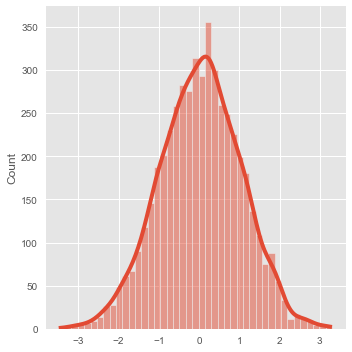

In [63]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (200, 10)

# Generating a distplot
sns.displot(x, bins='auto', kde=True)

<br>

<br>

Normal distribution, also known as the Gaussian distribution, is a probability function used in statistics that tells about how the data values are distributed. It usually resembles a bell-shaped curve. It is the most important probability distribution function used in statistics because of its advantages in real case scenarios. The normal distribution describes a common occurring distribution of samples influenced by a large or tiny, random distribution or which occurs often in nature [13]. For example, the height of the population. The normal distribution is symmetric about the mean i.e., showing that data near the mean are more frequent in occurrence than data far from the mean e.g. people are more likely to be in and around the average height than they are to be on the smaller or taller side.

<br>

##### Fitting 

<br>

`scipy.stats` allows us to fit a distribution to data. 

<br>

In [18]:
# Fitting normal distribution
location, scale = stats.norm.fit(x)

In [19]:
location, scale

(0.03183804786880168, 1.0058058589399272)

<br>

<br>

<br>

#### rv_discrete 

<br>

[Documentation for rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html)

The `scipy` documentation describes it as <i>"...a base class to construct specific distribution classes and instances for discrete random variables. It can also be used to construct an arbitrary distribution defined by a list of support points and corresponding probabilities"</i>.

<br>

In [49]:
# Setting seed so output stays the same
rng = np.random.default_rng(seed=5)

# Uniform distribution of random numbres
x = rng.uniform(1,10, 100000)

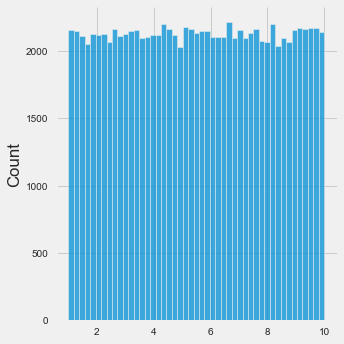

In [50]:
# Generating a displot
sns.displot(x)

<br>

<br>

As you can see from the above plot, it mimics a rectangular shape. This is the calling card of a uniform distribution. We are almost as equally likely to get a number 1 - 10 as another.

<br>

<br>

#### rv_histogram

[Documentation for rv_histogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html)

<br>

Generates a histogram based on a given distribution.  [Below code is taken from here](https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html)

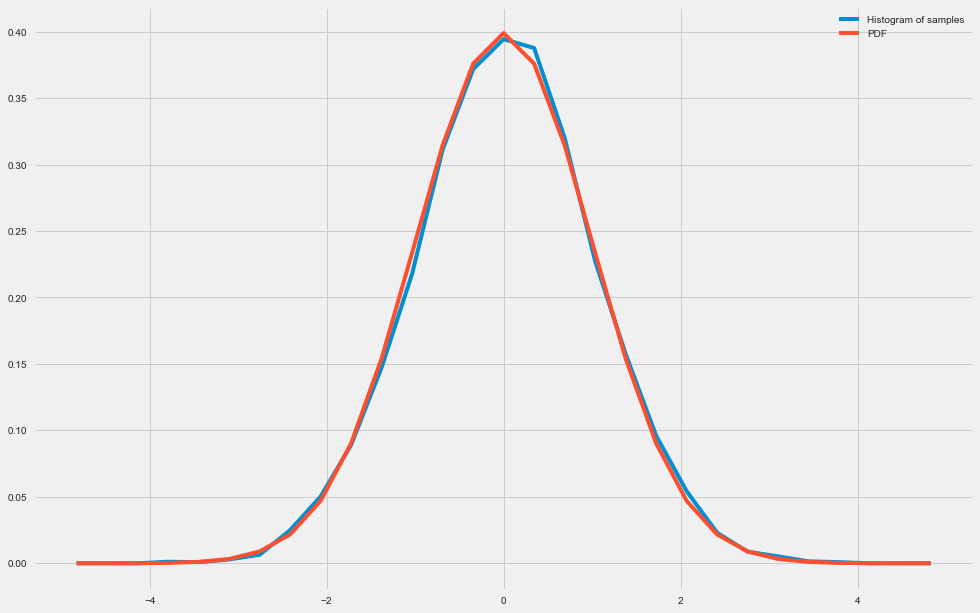

In [51]:
# Sample from a normal distribution
samples = rng.normal(size=10000)

# Generating a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
pdf = stats.norm.pdf(bin_centers)

# Plotting both plots
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")

# Adding a legend
plt.legend()

<br>

<br>

<br>

<br>

### Representions Of Distributions
***

<br>

<br>

##### Probability density function (PDF)

PDF is the likelihood of which a variable takes a specific value. Values which have a high PDF are more likely to happen. For example, the Gaussian bell in a normal distribution.

<br>

<br>

In [23]:
# Generating 1D array of equally spaced values 
x = np.linspace(-10, 10, 50) # start, stop, size

In [24]:
x

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

<br>

<br>

<br>

In [25]:
# Generating PDF
pdf = stats.norm.pdf(x)

Text(0, 0.5, 'PDF')

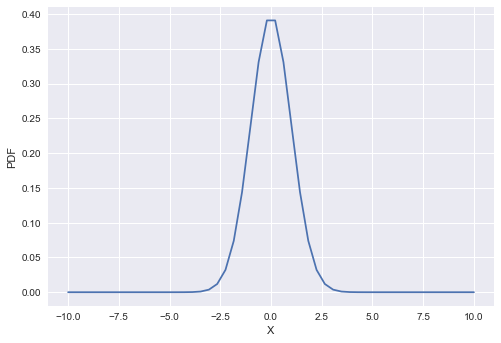

In [26]:
# Generating a plot
plt.plot(x, pdf)

# Labelling x and y axis
plt.xlabel('X')
plt.ylabel('PDF')

<br>

<br>

As we can see from the above plot, the data recreates the gaussian bell

<br>

<br>

##### Cumulative distribution function (CDF)

This is the probability that a variable takes a value less than or equal to X [14].


<br>

In [27]:
# Generating CDF using x
cdf = stats.norm.cdf(x, loc=location, scale=scale)

Text(0, 0.5, 'Probability')

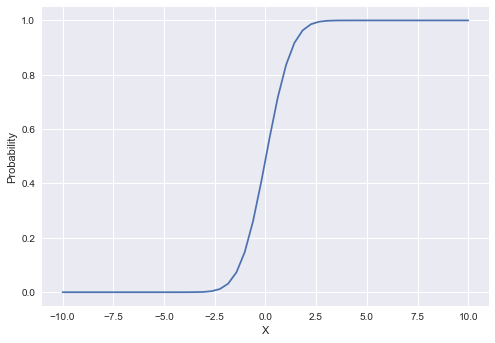

In [28]:
# Generating a plt
plt.plot(x, cdf)

# Labelling x and y axis
plt.xlabel('X')
plt.ylabel('Probability')

<br>

As we can see in the above plot, the x axis is <i>"...the allowable domain for the given probability function"</i> [14]. The y axis (probability) must fall between 0 and 1.

<br>

<br>

##### Percent Point Function (PPF)

PPF also known as he inverse distribution function, is the inverse of CDF. We use PPF to calculate the value of X for a given CDF value [15].

<br>

In [29]:
# Generating 10000 equally spaced numbers between 0 and 1
inverse =  np.linspace(0, 1, 10000)

<br>

<br>

In [30]:
# Generating PPF
x = stats.norm.ppf(inverse , loc=location, scale=scale)

Text(0, 0.5, 'CDF = P(x<=X)')

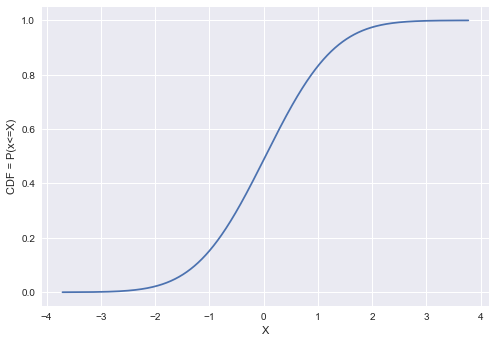

In [31]:
# Generating a plot
plt.plot(x, inverse)

# Labelling x and y axis
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)')

<br>

<br>

##### Probability Mass Function (PMF)

PMF is the probability to which a random variable will take on a particular value [15].

A binomial distribution derived from Bernoulli Process, can be thought of as probability of a success or failure outcome in an experiment which is repeated numerous times. The binomial distribution assumes that each experiment/event is independent of each other and that only two outcomes came occur, hence the word bi [16]. An example would be flipping a coin. The result can only be heads or tails, the chance of either appear is even.

<br>

![img](images/coin.jpg)

<br>

In [20]:
from scipy.stats import binom

<br>

In [21]:
# Probability of getting heads 5 times after throwning a coin 10 times
pmf = binom.pmf(k=5, p=0.5, n=10)

In [22]:
pmf

0.24609375000000003

<br>

<br>

We can skew the probability to be in our favour. 

If the probability of success is less than 0.5, the distribution is positively skewed i.e., the probabilities for x is greater for values below the expected value than above it.

And if the probability of success is greater than 0.5, the distribution is negatively skewed — i.e., probabilities for X are greater for values above the expected value than below it [17].


<br>

<br>

In [23]:
# Probability of getting heads 50 times after throwning a coin 100 times with skewed probaility 
neg_skew = binom.pmf(k=50, p=0.3, n=100)

In [24]:
neg_skew

1.302622713144528e-05

<br>

<br>

In [25]:
# Probability of getting heads 70 times after throwning a coin 100 times with skewed probaility 
pos_skew =  binom.pmf(k=70, p=0.7, n=100)

In [26]:
pos_skew

0.0867838647534282

<br>

<br>

<br>

***

### Descriptive Statistics

***


<br>

Descriptive Statistics refers to basic stats about the data such as min, max, mean, mode, variance, etc.  Below we will show some examples using `scipy.stats`, a full list of statistics can be found in the [SciPy Stats documentation](https://docs.scipy.org/doc/scipy/tutorial/stats.html).

<br>

#### Summary statistics

<br>

In [32]:
# A 1D array of 5 random intergrs between 0 (low) and 10 (exculsive).
x = rng.integers(0, 50, 20)

In [33]:
x

array([43,  8, 24, 24, 38, 19, 25, 47, 25, 31, 13,  3, 25, 39, 30, 25, 39,
        8, 23, 27], dtype=int64)

<br>

<br>

In [34]:
# Displays several data stats
stats.describe(x)

DescribeResult(nobs=20, minmax=(3, 47), mean=25.8, variance=140.4842105263158, skewness=-0.14043110539951972, kurtosis=-0.54791681605457)

- Kurtosis: This is how heavily the tails of a distribution differ from those of a normal distribution i.e., if the tails have extreme values [18]. 
- Variance: The spread of numbers in a data set.
- Skewness: This is measure of the symmetry of a distribution.

<br>

<br>

In [35]:
# Finding mode
stats.mode(x)

ModeResult(mode=array([25], dtype=int64), count=array([4]))

<br>

The mode refers to the number which appears most frequently [19]. 

<br>

<br>

In [36]:
# Finding standard error of the mean
stats.sem(x)

2.6503227211635547

<br>

<br>

Standard error of a mean tells how accurate the mean of any given sample is compared to the true population mean. When the standard error increases, i.e., the means are more spread out, the mean is not accurate of the true population [20].

<br>

<br>

In [37]:
# Finding nterquartile range (IQR)
stats.iqr(x, axis=0)

10.75

<br>

<br>

Interquartile range (IQR) is the difference between the 75% and 25% percentile of the data [21]

<br>

<br>

In [33]:
# Finding z score
stats.zscore(x)

array([ 1.48885666, -1.54079352, -0.15581058, -0.15581058,  1.05604949,
       -0.58861775, -0.06924915,  1.83510239, -0.06924915,  0.45011945,
       -1.10798635, -1.97360068, -0.06924915,  1.14261092,  0.36355802,
       -0.06924915,  1.14261092, -1.54079352, -0.24237201,  0.10387372])

<br>

<br>

A z-score tells you how far from the mean a data point is. It is measured in standard deviation units [22].

<br>

<br>

#### Frequency statistics

<br>

<br>

In [34]:
# Finding cumulative frequency 
stats.cumfreq(x)

CumfreqResult(cumcount=array([ 1.,  3.,  4.,  5.,  8., 13., 15., 18., 19., 20.]), lowerlimit=0.5555555555555554, binsize=4.888888888888888, extrapoints=0)

<br>

Cumulative frequency is <i>"...the sum of the class and all classes below it in a frequency distribution"</i> [23]. i.e., adding up a value and all of the values that came before it.

<br>

<br>

In [35]:
# Finding percentile of score
stats.percentileofscore(x, 20)

25.0

<br>

In [36]:
stats.percentileofscore(x, 45)

95.0

<br>

<br>

This function helps calculate the <i>"...percentile rank of a score relative to a list of scores"</i>[24]. In the example above 40% of the scores is below X and 95% in the second example. 

<br>

<br>

In [37]:
# Finding the score at percentile
stats.scoreatpercentile(x, 50) # 50 i.e.median

25.0

<br>

This function calculates the score at a given percentile [25].

<br>

<br>

In [38]:
# Finding the relative frequency
stats.relfreq(x)

RelfreqResult(frequency=array([0.05, 0.1 , 0.05, 0.05, 0.15, 0.25, 0.1 , 0.15, 0.05, 0.05]), lowerlimit=0.5555555555555554, binsize=4.888888888888888, extrapoints=0)

<br>

<br>

Relative frequency is the % or ratio of the number of times a value in the data occurs <i>"...in the set of all outcomes to the total number of outcomes" </i>[26].

<br>

<br>

In [38]:
# Generating an array of 5 intergers
binned = rng.integers(0,50,5)

In [39]:
binned

array([15, 42, 41, 39, 34], dtype=int64)

<br>

<br>

In [40]:
# Getting binned statistics
stats.binned_statistic(binned, np.arange(5), statistic='median', bins=2)


BinnedStatisticResult(statistic=array([0. , 2.5]), bin_edges=array([15. , 28.5, 42. ]), binnumber=array([1, 2, 2, 2, 2], dtype=int64))

<br>

<br>

This function calculates binned statistics for your data. This includes the sum, median, mean, count, etc. for values in each bin [27].

- bin edges: number of values in a bin 
- bin number: Indices of the bins in which each value of x belongs [28].

<br>

<br>

<br>

***

## T-Test

***

<br>

<br>

A T-Test is used to find if there is a significant difference between the mean of two arrays or groups which may be related in certain features [29].

<br></br>

T-Tests are used as a hypothesis testing tool [30]. To calculate the T-Test we need:
- The difference between mean values from each data set.
- The standard deviation of each group.
- The number of data values of each. [30]

<br></br>

Depending on the type of analysis and data, different T-Tests can be used.

<br>

<br>

![img](images/t-test.png)

<br>

<br>

<br>

![img](images/p_value.webp)

<br>

#### One Sample T-Test


<br>

In this test, the test variable’s mean (random sample from the population) is compared against a hypothesised value of the population mean. The hypothesised value can be taken from trusted sources such as industry standards, lit review, legal requisites, etc. [29]

A One Sample T-Test can only be used to compare a single sample mean to a defined constant. i.e., it cannot be used to compare means between two or more groups [30].

<br>

##### Assumptions
- Dependent variables have a normal distribution (approx.)
- Observations are independent from each other 
- Sample is random [32]


<br>

##### Hypotheses

- Null hypothesis: Sample mean = hypothesised mean.
- Alternative hypothesis: Sample mean != hypothesised mean (two-tailed or two-sided).
- Alternative hypothesis: Sample mean < or > to hypothesised mean (one-tailed or one-sided) [32].

<br>

<br>

![img](images/t-test_one.png)

<br>

<br>

<br>

![img](images/t-test_one_equation.jpg)

- μ0 = The test value -- the proposed constant for the population mean
- x¯ = Sample mean
- n = Sample size (i.e., number of observations)
- s = Sample standard deviation
- sx¯ = Estimated standard error of the mean (s/sqrt(n))


<br>

<br>


If the calculated t value > critical t value, then the null hypothesis is rejected [31]. 

Using `scipy.stats` let's put this into practice. 

Let's suppose a teacher wants her class to score at least 60% on their exam. By taken a random sample of 6 students let's see how confident she can be of the result.

<br>

<br>

In [41]:
# Setting seed so output stays the same
rng = np.random.default_rng(seed=0)

# Generating an array of 6 integers 
grades = rng.integers(40, 100, 6)

In [42]:
grades

array([91, 78, 70, 56, 58, 42], dtype=int64)

<br>

<br>

<AxesSubplot:ylabel='Density'>

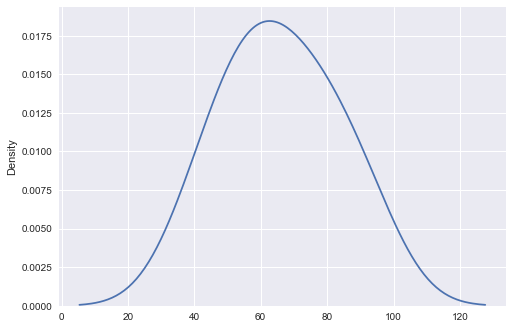

In [43]:
# Generating a kdeplot
sns.kdeplot(grades)

<br>

<br>

we can see that our sample follows a normal distribution - bell shaped. 

<br>

In [45]:
#t-Test, hypotitis mean
stats.ttest_1samp(grades, 60)

Ttest_1sampResult(statistic=0.818212731171209, pvalue=0.4504546683385968)

<br>

<br>

The hypothesis is rejected as the p value is less than the significance of 0.05.

<br>

<br>

<br>

### Two Sample T-Test

<br>

Otherwise known as the independent samples t-test, is used to compare the mean of two independent groups. It is used to test whether an <i>“...unknown population means of two groups are equal or not” </i>[33].

An independent sample test can only be used to compare the means for two groups [32]. 


<br>

<br>

##### Assumptions

- Both groups have a normal distribution (approx.).
- Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
- Both samples are independent from each other.
- Variance for both groups is equal [33]. 


<br>

<br>

##### Hypotheses

- Null hypothesis: Both groups are equal
- Alternative hypothesis: The mean of both groups is different (two-tailed or two-sided).
- Alternative hypothesis: The mean of one group is < or > than the other (one-tailed or one-sided) [32].


<br>

<br>

##### Equal Variance 

<br>

![img](images/t-test_two.png)



<br>

<br>

##### Unequal Variance

<br>

![img](images/t-test_two_unequal.png)


<br>

<br>

<br>

In [46]:
# Creating 2 arrays for example
group1 = [5, 10, 6 , 3, 7, 5, 2, 1, 4, 9]
group2 = [2, 9, 3, 1, 8, 5, 6, 10, 6, 2]

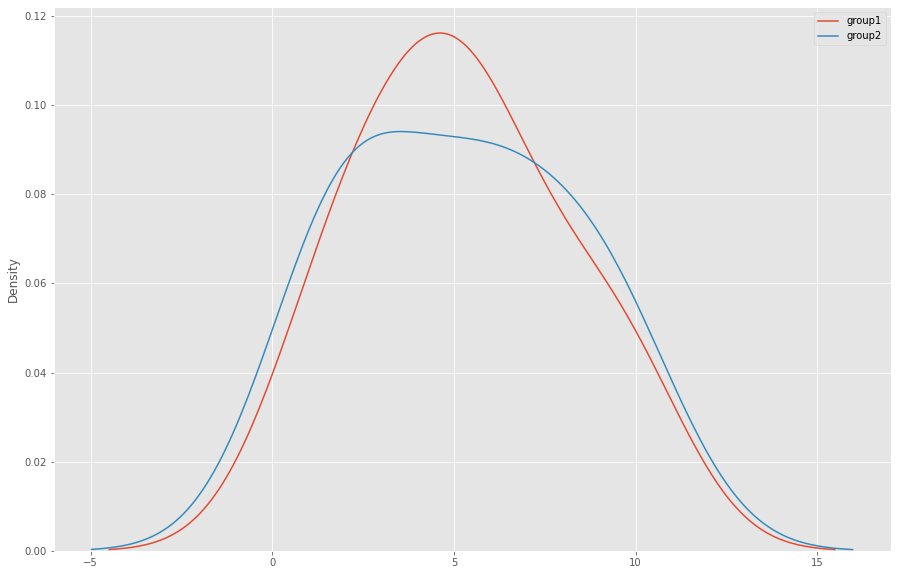

In [47]:
# Generating kdeplot for both groups
sns.kdeplot(group1, label='group1')
sns.kdeplot(group2, label='group2')

# Adding a legend
plt.legend()

<br>

<br>

Both samples seem to follow a normal distribution, let's check the variance.

<br>

In [1]:
# Checking variance
print(np.var(group1), np.var(group2))

NameError: name 'np' is not defined

<br>

As the ratio is less than 4, equal variance can be assumed.

<br>

In [49]:
# Two sample t-test
stats.ttest_ind(group1, group2, equal_var=True)

Ttest_indResult(statistic=0.0, pvalue=1.0)

<br>

As the p-value of the test (1.0) is greater the significance (0.05). The null hypothesis is rejected.

<br>

<br>

### Paired T-Test

<br>

Otherwise known as a dependent sample t-test is used to compare the differences between a pair of dependent variables [32]. E.g,. take a blood test before and after a treatment. 

A paired t-test is a<i> “...one sample t-test on the differences between the two dependent variables”</i> [35].


<br>

##### Assumptions

- Differences between dependent variables has a normal distribution (approx.).
- Observations are independent.
- No major outliers.
- Dependent variables must be continuous [35].


<br>

<br>

##### Hypotheses

- Null hypothesis: No difference between both variables. 
- Alternative hypothesis: There is a difference between both variables (two-tailed or two-sided).
- Alternative hypothesis: The difference between both variables is < or > than 0 (one-tailed or one-sided) [32].


<br>

<br>

![img](images/paired_t-test.PNG)
 

<br>

<br>

<br>

In the below example, let's imagine a nurse has taken a blood test, pre and post proceedure 

<br>

![img](images/blood.png)

<br>

In [50]:
# Creating 2 arrays for example
pre_test = [77, 80, 84, 79, 91, 99, 80, 79, 87, 90]
post_test = [97, 76, 80, 79, 83, 90, 87, 74, 81, 77]

<br>

<br>

([<matplotlib.axis.XTick at 0x29b6acac520>], [Text(1, 0, 'Post Test')])

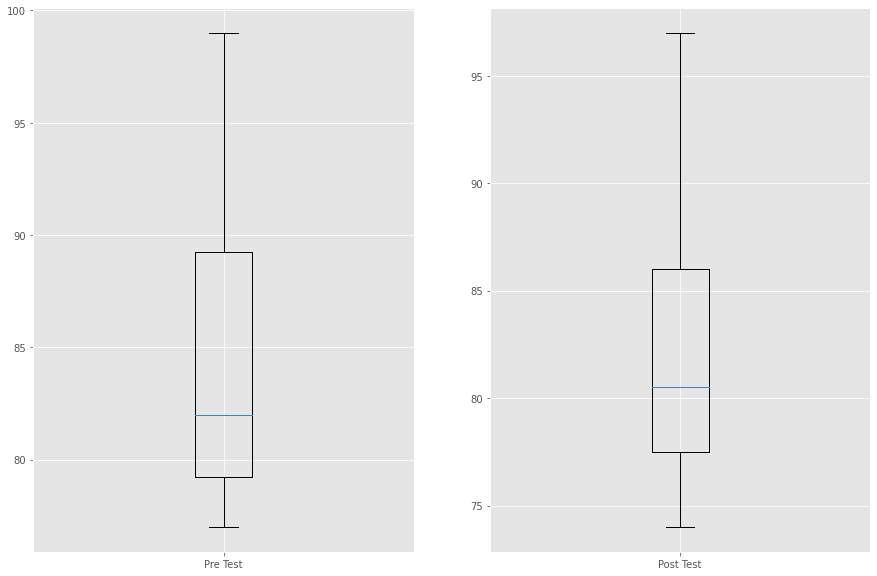

In [94]:
# Generating a subplot
plt.subplot()

# First subplot
plt.subplot(1,2,1)
plt.boxplot(pre_test)

# Adding tick to the x axis
plt.xticks([1], ['Pre Test'])


# Second subplot
plt.subplot(1,2,2)
plt.boxplot(post_test)

# Adding tick to the x axis
plt.xticks([1], ['Post Test'])


<br>

<br>

There are no major outliers in the data. Let's check for normality.

<br>

<br>

In [52]:
# Checking for normaility
stats.shapiro(pre_test)

ShapiroResult(statistic=0.8913229703903198, pvalue=0.17548654973506927)

<br>

In [53]:
# Checking for normaility
stats.shapiro(post_test)

ShapiroResult(statistic=0.9267391562461853, pvalue=0.4165952205657959)

<br>

As the p-value is greater than 0.05, then the null hypothesis is not rejected i.e normally distributed.

<br>

<br>

<br>

In [54]:
# Paired t-test
stats.ttest_rel(pre_test, post_test)

Ttest_relResult(statistic=0.7344221733291848, pvalue=0.4813870508075234)

<br>

As the p-value of the test (0.3256) is less than alpha (0.05), the null hypothesis is rejected. i.e., the true mean is different for patients pre and post treatment.

<br>

<br>

<br>

## T-Score
***

<br>

<i>“Statistical tests generate a test statistic showing how far from the null hypothesis of the statistical test your data is. They then calculate a p-value that describes the likelihood of your data occurring if the null hypothesis were true”</i> [36].

The test statistic for t-tests and regression tests is the t-score, also known as the t-value. It is the number of standard deviations from the mean of the t-distribution [36]. The T-score is usually taken from a t-table [link to one here](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf).

The t-score formula lets you take an individual score and change it into a standardised form, which you can then use to compare scores [37]. The larger the difference is between the groups you are testing. 


<br>

<br>

<br>

***
***

## ANOVA
***

<br>

Analysis of Variance (ANOVA)  is a statistical inference test that lets you compare multiple groups at the same time. It is used to calculate the degree to which a dependent variable is influenced by one or more independent categorical variables [38]. 

A T-Test is used to compare the means of a condition between two groups, whereas ANOVA is used when we want to compare the means of a condition between more than two groups [39].

The output of the ANOVA formula, called the F statistic or  F-ratio. The F statistic <i> “...enables the analysis of the multiple sets of data in order to determine the variability among the samples and within samples” </i>[39].


<br>

##### Assumptions

- The data follows normal distribution.
- The variance of data is the same for all groups.
- Data among groups is independent from each other.
- The dependent variable should be continuous 
- No significant outliers. 
- The independent variable should be made up of two or more categorical independent groups [38]. 



<br>

<br>

##### Hypothesis

- Null hypothesis: The statistical mean of all the groups/categories of the variables are equal.
- Alternate Hypothesis: The statistical mean of all the groups/categories of the variables are not equal [39].


<br>

<br>

##### Types of ANOVA

There are three types of ANOVA [39]:

1. One-Way ANOVA Test: Only one independent variable.
2. Two-Way ANOVA Test: There are two independent variables.
    - Replication: The two-way ANOVA test with Replication is carried out when two groups and the members of those groups are performing multiple tasks. E.g., vaccine for Coronavirus is still under development. Doctors are performing two different treatments in order to cure two groups of patients infected by the virus.
    - Without Replication: The two-way ANOVA test without Replication is carried out when we have only one group, and we are double-testing that same group. E.g.  the vaccine has been developed successfully, and the researchers are testing one set of volunteers before and after they have been vaccinated in order to observe whether the vaccination is working properly or not.

3. n-Way ANOVA Test: There are more than two independent variables.

<br>

<br>

<br>

#### Post ANOVA Test
***
<br>
The goal of the ANOVA test is to <i>"...determine the statistically significant difference between the groups, if it is available. In case we find one, we will then have to test where the spot of group differences" </i>[40].

As the results of an ANOVA don't identify which particular <i>"...differences between pairs of means are significant"</i> [41], to decipher this we use post hoc tests <i>"To explore differences between multiple groups means while controlling the experiment-wise error rate"</i> [40].

Examples of these tests include the Bonferroni, Dunnet, Scheffe, and Turkey tests.


<br>

<br>

<br>

#### ANOVA Example
***

<br>

The dataset used in the following example was downloaded from [here](https://www.kaggle.com/spscientist/students-performance-in-exams?select=StudentsPerformance.csv).

This dataset consists of student test score data for subjects including math, reading, and writing. The goal of this analysis is to determine correlation between the categorical variables ('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course') and the test scores in math, reading, and writing.

<br>

<br>

<br>

![img](images/diet.webp)

<br>

<br>

<br>

### Loading Data and Exploration
***

<br>

In [55]:
# Importing the dataset
df = pd.read_csv('datasets/StudentsPerformance.csv')

In [56]:
# Checking the data loaded
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<br>

gender is binary variable which contains 0 for Female and 1 for Male.

<br>

<br>

In [57]:
# Checking the shape of the dataset
df.shape

(1000, 8)

<br>

<br>

In [58]:
# Getting a general overview of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<br>

<br>

<br>

In [59]:
# Getting an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<br>

<br>

<br>

In [60]:
# Checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<br>

<br>

There are no missing values.

<br>

<br>

In [61]:
# Unique vaules for race/ethnicity
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

<br>

There is an equal amount of people on each diet.

<br>

<br>

In [62]:
# Unique vaules for gender i.e. how many females and males
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

<br>

<br>

<br>

<br>

In [63]:
# Getting stats per gender
df.groupby('gender').agg([np.mean, np.median, np.count_nonzero, np.std ])

math score                                 reading score         \
             mean median count_nonzero        std          mean median   
gender                                                                   
female  63.633205   65.0           517  15.491453     72.608108   73.0   
male    68.728216   69.0           482  14.356277     65.473029   66.0   

                                writing score                                  
       count_nonzero        std          mean median count_nonzero        std  
gender                                                                         
female           518  14.378245     72.467181   74.0           518  14.844842  
male             482  13.931832     63.311203   64.0           482  14.113832

<br>

 Females on average out preformed their male counterparts.

<br>

<br>

In [64]:
# Getting stats per race/ethnicity
df.groupby('race/ethnicity').agg([np.mean, np.median, np.count_nonzero, np.std ])

math score                                 reading score  \
                     mean median count_nonzero        std          mean   
race/ethnicity                                                            
group A         61.629213   61.0            89  14.523008     64.674157   
group B         63.452632   63.0           190  15.468191     67.352632   
group C         64.463950   65.0           318  14.852666     69.103448   
group D         67.362595   69.0           262  13.769386     70.030534   
group E         73.821429   74.5           140  15.534259     73.028571   

                                               writing score         \
               median count_nonzero        std          mean median   
race/ethnicity                                                        
group A          64.0            89  15.543762     62.674157   62.0   
group B          67.0           190  15.177499     65.600000   67.0   
group C          71.0           319  13.997033     67.827586   68.0   
group D          71.0           262  13.895306     70.145038   72.0   
group E          74.0           140  14.874024     71.407143   72.0   

                                         
               count_nonzero        std  
race/ethnicity                           
group A                   89  15.468278  
group B                  190  15.625173  
group C                  319  14.983378  
group D                  262  14.367707  
group E                  140  15.113906

<br>

<br>

<br>

In [65]:
# Getting stats per parental level of education
df.groupby('parental level of education').agg([np.mean, np.median, np.count_nonzero, np.std ])

math score                                  \
                                  mean median count_nonzero        std   
parental level of education                                              
associate's degree           67.882883   67.0           222  15.112093   
bachelor's degree            69.389831   68.0           118  14.943789   
high school                  62.137755   63.0           196  14.539651   
master's degree              69.745763   73.0            59  15.153915   
some college                 67.128319   67.5           226  14.312897   
some high school             63.497207   65.0           178  15.927989   

                            reading score                                  \
                                     mean median count_nonzero        std   
parental level of education                                                 
associate's degree              70.927928   72.5           222  13.868948   
bachelor's degree               73.000000   73.0           118  14.285250   
high school                     64.704082   66.0           196  14.132130   
master's degree                 75.372881   76.0            59  13.775163   
some college                    69.460177   70.5           226  14.057049   
some high school                66.938547   67.0           179  15.479295   

                            writing score                                  
                                     mean median count_nonzero        std  
parental level of education                                                
associate's degree              69.896396   70.5           222  14.311122  
bachelor's degree               73.381356   74.0           118  14.728262  
high school                     62.448980   64.0           196  14.085907  
master's degree                 75.677966   75.0            59  13.730711  
some college                    68.840708   70.0           226  15.012331  
some high school                64.888268   66.0           179  15.736197

<br>

<br>

Student's whose parents completed third level education performed better than those whose parent's didn't.

<br>

<br>

In [66]:
# Getting stats per parental level of education
df.groupby('test preparation course').agg([np.mean, np.median, np.count_nonzero, np.std ])

math score                                  \
                              mean median count_nonzero        std   
test preparation course                                              
completed                69.695531   69.0           358  14.444699   
none                     64.077882   64.0           641  15.192376   

                        reading score                                  \
                                 mean median count_nonzero        std   
test preparation course                                                 
completed                   73.893855   75.0           358  13.638384   
none                        66.534268   67.0           642  14.463885   

                        writing score                                  
                                 mean median count_nonzero        std  
test preparation course                                                
completed                   74.418994   76.0           358  13.375335  
none                        64.504673   65.0           642  14.999661

<br>

<br>

As expected students who completed the test preparation performed better.

<br>

<br>

<br>

### Visualisation
***

<br>

<br>

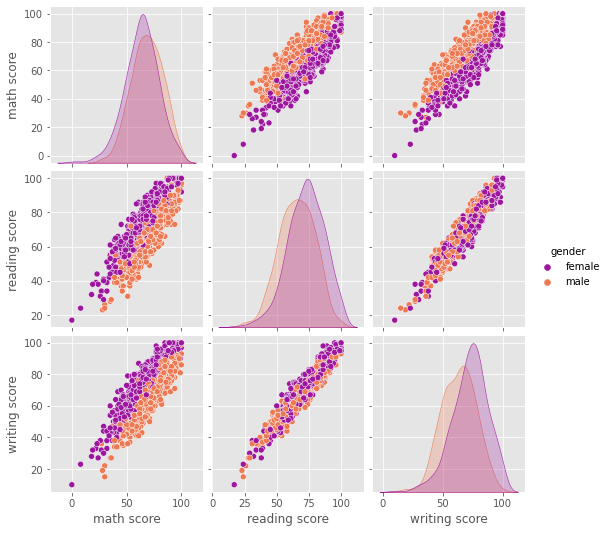

In [67]:
# Generating a pairplot 
sns.pairplot(df, hue='gender',palette='plasma')

<br>

<br>

Females perform higher in reading and writing while males perform higher on math.

<br>

<br>

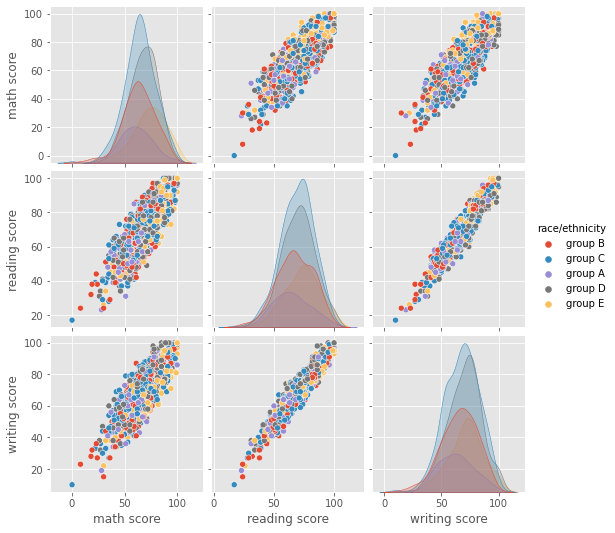

In [68]:
# Generating a pairplot 
sns.pairplot(df, hue='race/ethnicity')

<br>

<br>

There seems to be quite an even spread throughout the different race/ethnicities. Unfortunately, we aren't given information about which race/ethnicities are represented in the dataset.

<br>

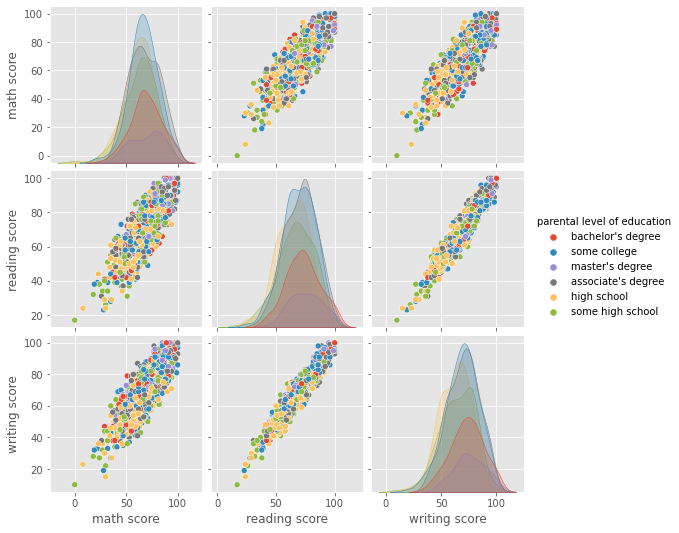

In [69]:
# Generating a pairplot 
sns.pairplot(df, hue='parental level of education')

<br>

<br>

<br>

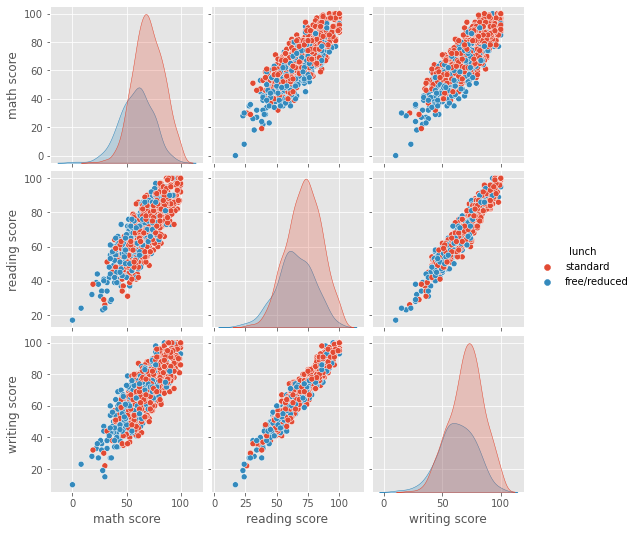

In [70]:
# Generating a pairplot 
sns.pairplot(df, hue='lunch')

<br>

<br>

<br>

<br>

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

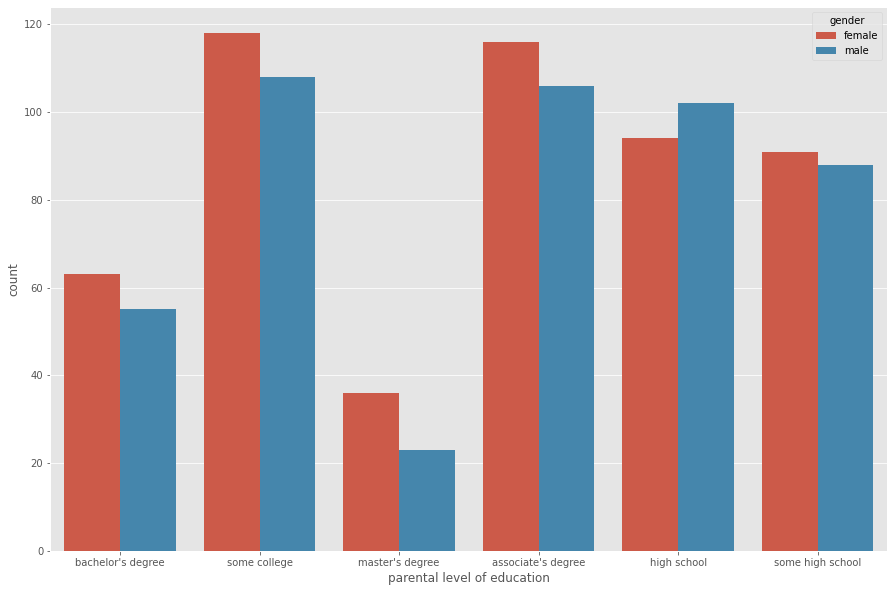

In [71]:
# Generating a countplot
sns.countplot(data=df, x='parental level of education', hue='gender')

<br>

<br>

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

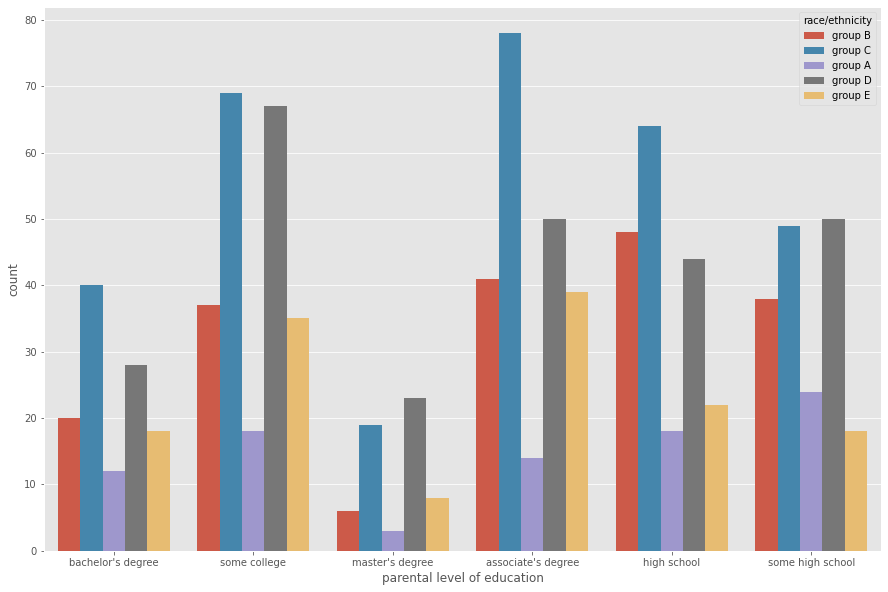

In [72]:
# Generating a countplot
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity')

<br>

<br>

<br>

### ANOVA Analysis - One Way
***

<br>

Hypothesis: Using a 95% confidence internal

- Null hypothesis = they are independent.
- Alternate hypothesis = categorical data is correlated in some way.

<br>

<br>

In [73]:
# creating an average score column
df['average'] = (df['math score'] + df['reading score'] + df['writing score'])/3


In [74]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<br>

<br>

<br>

In [75]:
dependent = df['average']

In [76]:
dependent

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average, Length: 1000, dtype: float64

<br>

<br>

<br>

<br>

In [77]:
dependent.describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: average, dtype: float64

<br>

<br>

<br>

In [78]:
independent = df['gender']

In [79]:
independent

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

<br>

<br>

#### Outliers

<br>

<AxesSubplot:xlabel='gender', ylabel='average'>

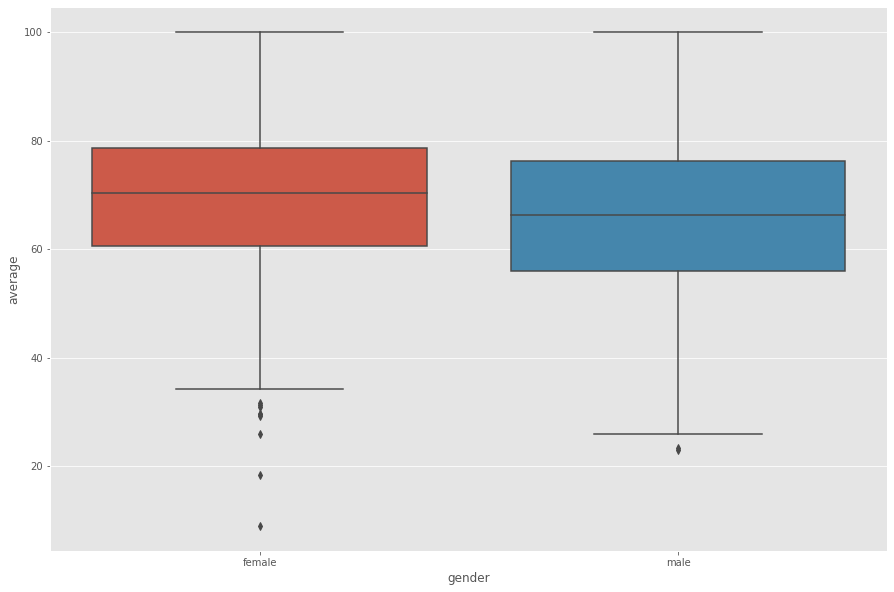

In [80]:
# Generating a boxplot for each diet 
sns.boxplot(y=dependent, x=independent)

<br>

<br>

<i>"Outliers tend to increase the estimate of sample variance, thus decreasing the calculated F statistic for the ANOVA and lowering the chance of rejecting the null hypothesis. They may be due to recording errors, which may be correctable, or they may be due to the sample not being entirely from the same population" </i>[41]. 

<br>

<br>

<br>

#### Normaility

<br>

<AxesSubplot:xlabel='average', ylabel='Density'>

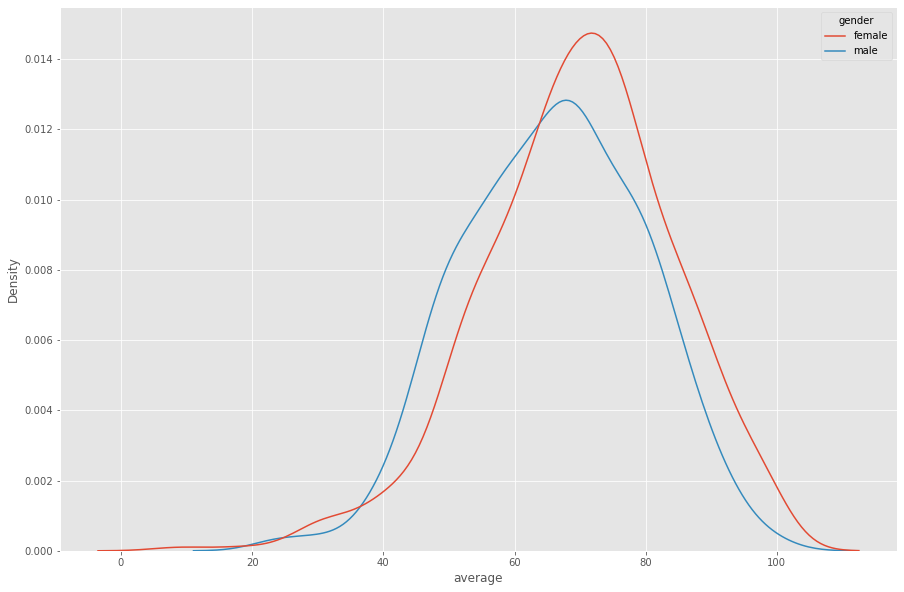

In [81]:
# KDEs of the three categories.
# KDEs of the three categories.
sns.kdeplot(x=dependent, hue=independent)

<br>

<br>

<br>

In [82]:
# Changing lunch column into binary values to work with
df.replace({'female': 0,'male': 1}, inplace=True)

In [83]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,0,group C,some college,standard,completed,69,90,88,82.333333
2,0,group B,master's degree,standard,none,90,95,93,92.666667
3,1,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,1,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95,94.000000
996,1,group C,high school,free/reduced,none,62,55,55,57.333333
997,0,group C,high school,free/reduced,completed,59,71,65,65.000000
998,0,group D,some college,standard,completed,68,78,77,74.333333


<br>

<br>

#### Normaility

<br>

In [84]:
stats.shapiro(dependent[independent == 0])

ShapiroResult(statistic=0.9857915639877319, pvalue=6.0721460613422096e-05)

<br>

Data follows a normal distribution i.e., > 0.05

<br>

In [85]:
stats.shapiro(dependent[independent == 1])

ShapiroResult(statistic=0.9940786957740784, pvalue=0.0576900988817215)

<br>

Data deviates from a normal distribution i.e., > 0.05

<br>

<br>

<br>

#### Variances

<br>

In [86]:
# Homogeneity of Variances
stats.levene(dependent[independent == 0],
            dependent[independent == 1])

LeveneResult(statistic=0.13445392794140468, pvalue=0.7139357521839773)

<br>

<br>

#### One Way ANOVA

<br>

In [87]:
# Anova one way
stats.f_oneway(dependent[independent == 0],
            dependent[independent == 1])

F_onewayResult(statistic=17.388178840521498, pvalue=3.311973638245066e-05)

<br>

<br>

<br>

<br>

### Post Hoc ANOVA 

<br>

For a one-way ANOVA, you will probably find that just two tests need to be considered. As the data met the assumption of homogeneity of variances we can use Tukey's honestly significant difference (HSD) post hoc test. 

<br>

In [88]:
# Importing tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [89]:
# Creating a new dataframe
df_ = pd.DataFrame({'average': df['average'], 'gender': df['gender']})

In [90]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(df_, df['gender'],
                          alpha=0.05)


In [91]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -3.732 0.001 -5.4883 -1.9757   True
---------------------------------------------------


<br>

<br>

Female students have a higher success rate than male counterparts.

<br>

<br>

***

## References

***

[1] 	Wikipedia contributors. SciPy [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Nov 15]. Available from: https://en.wikipedia.org/w/index.php?title=SciPy&oldid=1051739908
 	 
[2] 	Johari A. What is Python SciPy and How to use it? - Edureka - Medium [Internet]. Edureka. 2019 [cited 2021 Nov 15]. Available from: https://medium.com/edureka/scipy-tutorial-38723361ba4b
 	 
[3]	Mujtaba H. SciPy Tutorial for Beginners [Internet]. Mygreatlearning.com. 2020 [cited 2021 Nov 15]. Available from: https://www.mygreatlearning.com/blog/scipy-tutorial/
 	 
[4]	Data Analysis with SciPy [Internet]. Geeksforgeeks.org. 2019 [cited 2021 Nov 15]. Available from: https://www.geeksforgeeks.org/data-analysis-with-scipy/
 	 
[5]	SciPy - Stats [Internet]. Tutorialspoint.com. [cited 2021 Nov 15]. Available from: https://www.tutorialspoint.com/scipy/scipy_stats.htm
 	 
[6].	Statistical functions (scipy.stats) — SciPy v1.7.1 Manual [Internet]. Scipy.org. [cited 2021 Nov 15]. Available from: https://docs.scipy.org/doc/scipy/reference/stats.html
 	 
[7]	Data-flair.training. [cited 2021 Nov 15]. Available from: http://data-flair.training/blogs/scipy-statistical-functions/
 	 
[8]	Ranganathan P, Gogtay NJ. An Introduction to Statistics - Data Types, distributions and Summarizing Data. Indian J Crit Care Med. 2019;23(Suppl 2):S169–70.
 	 
[9]	carlolepelaars. Statistics Tutorial [Internet]. Kaggle.com. Kaggle; 2019 [cited 2021 Nov 16]. Available from: https://www.kaggle.com/carlolepelaars/statistics-tutorial
 	 
[10]	Scipy stats.Rv_continuous() [Internet]. Geeksforgeeks.org. 2019 [cited 2021 Nov 16]. Available from: https://www.geeksforgeeks.org/scipy-stats-rv_continuous-python/
 	 
[11]	Code faster with Line-of-Code Completions, cloudless processing [Internet]. Kite.com. [cited 2021 Nov 16]. Available from: https://www.kite.com/python/docs/scipy.stats.rv_continuous
 	 
[12]	Pretag Team. How do you use scipy.stats.rv_continuous? [Internet]. Pretagteam.com. [cited 2021 Nov 16]. Available from: https://pretagteam.com/question/how-do-you-use-scipystatsrvcontinuous
 	 
[13]	Wikipedia contributors. Normal distribution [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Nov 16]. Available from: https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1049556144
 	 
[14]	Pham H, editor. Springer Handbook of Engineering Statistics [Internet]. 2006th ed. London, England: Springer; 2007. Available from: http://dx.doi.org/10.1007/978-1-84628-288-1
 	 
[15]	Discrete statistical distributions — SciPy v1.7.1 manual [Internet]. Scipy.org. [cited 2021 Nov 16]. Available from: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html
 	 
[16]	Binomial Distribution: Formula, What it is, How to use it [Internet]. Statisticshowto.com. 2018 [cited 2021 Nov 16]. Available from: https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/
 	 
[17]	How to Graph the Binomial Distribution - dummies [Internet]. Dummies.com. 2016 [cited 2021 Nov 16]. Available from: https://www.dummies.com/education/math/business-statistics/how-to-graph-the-binomial-distribution/
 	 
[18]	Kurtosis [Internet]. Corporatefinanceinstitute.com. 2020 [cited 2021 Nov 16]. Available from: https://corporatefinanceinstitute.com/resources/knowledge/other/kurtosis/
 	 
[19]	Hayes A. Mode [Internet]. Investopedia.com. 2021 [cited 2021 Nov 16]. Available from: https://www.investopedia.com/terms/m/mode.asp
 	 
[20]	Ilola E. A beginner’s guide to standard deviation and standard error - Students 4 Best Evidence [Internet]. Cochrane.org. 2018 [cited 2021 Nov 16]. Available from: https://s4be.cochrane.org/blog/2018/09/26/a-beginners-guide-to-standard-deviation-and-standard-error/
 	 
[21]	Potter K. Methods for presenting statistical information: The box plot [Internet]. Psu.edu. [cited 2021 Nov 16]. Available from: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.132.66&rep=rep1&type=pdf
 	 
[22]	Z-score: Definition, formula and calculation [Internet]. Statisticshowto.com. 2016 [cited 2021 Nov 16]. Available from: https://www.statisticshowto.com/probability-and-statistics/z-score/
 	 
[23]	Cumulative frequency distribution: Simple definition, easy steps [Internet]. Statisticshowto.com. 2021 [cited 2021 Nov 16]. Available from: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/cumulative-frequency-distribution/
 	 
[24]	sciPy stats.percentileofscore() [Internet]. Geeksforgeeks.org. 2019 [cited 2021 Nov 16]. Available from: https://www.geeksforgeeks.org/scipy-stats-percentileofscore-python/
 	 
[25]	scipy.stats.scoreatpercentile — SciPy v1.7.1 Manual [Internet]. Scipy.org. [cited 2021 Nov 16]. Available from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.scoreatpercentile.html
 	 
[26]	Lumen Learning, OpenStax. 1.5 Frequency & Frequency Tables [Internet]. Lumenlearning.com. [cited 2021 Nov 16]. Available from: https://courses.lumenlearning.com/odessa-introstats1-1/chapter/frequency-frequency-tables/
 	 
[27]	sciPy stats.binned_statistic() function [Internet]. Geeksforgeeks.org. 2019 [cited 2021 Nov 16]. Available from: https://www.geeksforgeeks.org/scipy-stats-binned_statistic-function-python/
 	 
[28]	scipy.stats.binned_statistic — SciPy v1.7.1 Manual [Internet]. Scipy.org. [cited 2021 Nov 16]. Available from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html
 	 
[29]	T-test [Internet]. Geeksforgeeks.org. 2020 [cited 2021 Nov 16]. Available from: https://www.geeksforgeeks.org/t-test/
 	 
[30]	Hayes A. T-Test [Internet]. Investopedia.com. 2021 [cited 2021 Nov 16]. Available from: https://www.investopedia.com/terms/t/t-test.asp
 	 
[31]	Yeager K. LibGuides: SPSS Tutorials: One Sample t Test. 2013 [cited 2021 Nov 17]; Available from: https://libguides.library.kent.edu/SPSS/OneSampletTest
 	 
[32]	Bedre R. Perform three types of t-test in Python [Internet]. Reneshbedre.com. 2019 [cited 2021 Nov 17]. Available from: https://www.reneshbedre.com/blog/ttest.html
 	 
[33]	Two-Sample t-Test [Internet]. Jmp.com. 2020 [cited 2021 Nov 17]. Available from: https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test/two-sample-t-test.html
 	 
[34]	Ross A, Willson VL. Paired Samples T-Test. In: Basic and Advanced Statistical Tests. Rotterdam: SensePublishers; 2017. p. 17–9.
 	 
[35]	Bevans R. T-distribution: What it is and how to use it [Internet]. Scribbr.com. 2020 [cited 2021 Nov 18]. Available from: https://www.scribbr.com/statistics/t-distribution/
 	 
[36]	T score formula: Calculate in easy steps [Internet]. Statisticshowto.com. 2018 [cited 2021 Nov 18]. Available from: https://www.statisticshowto.com/probability-and-statistics/t-distribution/t-score-formula/
 	 
[37]	One-way ANOVA in SPSS Statistics - Step-by-step procedure including testing of assumptions [Internet]. Laerd.com. [cited 2021 Nov 18]. Available from: https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
 	 
[38]	ANOVA Test in Python [Internet]. Javatpoint.com. [cited 2021 Nov 18]. Available from: https://www.javatpoint.com/anova-test-in-python
 	 
[39]	Guest Blog. Introduction to ANOVA for statistics and data science [Internet]. Analyticsvidhya.com. 2020 [cited 2021 Nov 21]. Available from: https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/
 	 
[40]	Frost J. Using post hoc tests with ANOVA - statistics by Jim [Internet]. Statisticsbyjim.com. 2019 [cited 2021 Nov 18]. Available from: https://statisticsbyjim.com/anova/post-hoc-tests-anova/
 	 
[40]	Does your data violate one-way ANOVA assumptions? [Internet]. Quality-control-plan.com. [cited 2021 Nov 21]. Available from: https://www.quality-control-plan.com/StatGuide/oneway_anova_ass_viol.htm
 	 


### Images

- [Scipy Logo](https://image.pngaaa.com/125/1971125-small.png)
- [Coin](https://www.google.com/url?sa=i&url=https%3A%2F%2Ffree3d.com%2F3d-model%2F2-euro-coin-italy-4150.html&psig=AOvVaw3914ZDmMJJRuMCZL_bZdBl&ust=1634761631572000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCPjQmeen1_MCFQAAAAAdAAAAABAL)
- [T-Test](https://datatab.net/assets/tutorial/one_Sample_t-Test.png)
- [P-value](https://www.simplypsychology.org/p-value.png?ezimgfmt=ng%3Awebp%2Fngcb30%2Frs%3Adevice%2Frscb30-1)
- [T-Test One](https://datatab.net/assets/tutorial/einseitigZweiseitig_en_new.png)
- [T-Test Two](https://datatab.net/assets/tutorial/t-test-for-independent-samples-homogene-variance.png)
- [Paired T-Test](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/paired-t-test-formula-1-1621582339.png)
- [Blood Test](https://www.vexels.com/png-svg/preview/208627/blood-test-tube-badge)
- [Anova Equation](https://static.javatpoint.com/python/images/anova-test-in-python.png)
- [Equal Vairance](https://datatab.net/assets/tutorial/t-test-for-independent-samples-homogene-variance.png)
- [Unequal Variance](https://datatab.net/assets/tutorial/t-test-for-independent-samples-heterogeneous-variance.png)
- [Apple](https://iconscout.com/icon/diet-plan-2054970)


# End